In [1]:
source('../common.r')

In [2]:
d <- data.rubis(where="name = 'v0.28.2-sampa-sampled' and samples_txn_rate is not null and samples_txn_rate != '{}' and mix = 'bid-heavy' and phasing = 1")

Loading required package: tcltk
The following `from` values were not present in `x`: 0
The following `from` values were not present in `x`: rw#NA, simple#NA
The following `from` values were not present in `x`: rw#NA, simple#NA
The following `from` values were not present in `x`: rw#0#off, simple#0#off, simple#1#off


In [3]:
nrow(d)

[1] 3

In [4]:
samples <- adply(d, 1, function(r){
  s <- subset(r, select=c('id','cc','phasing','cc_ph','mix'))
  h <- to.hist(jsfix(r$samples_txn_rate))
  h$x <- h$x / 1e6 # convert to seconds
  data.frame(s, h)
})
samples$x <- ave(samples$x, cut(samples$x, 60*3))
samples$y <- samples$y * 4 # mult by nclients for total
samples <- subset(samples, x > 14 & x < 46)

Warning message:
In data.frame(s, h): row names were found from a short variable and have been discardedWarning message:
In data.frame(s, h): row names were found from a short variable and have been discardedWarning message:
In data.frame(s, h): row names were found from a short variable and have been discarded

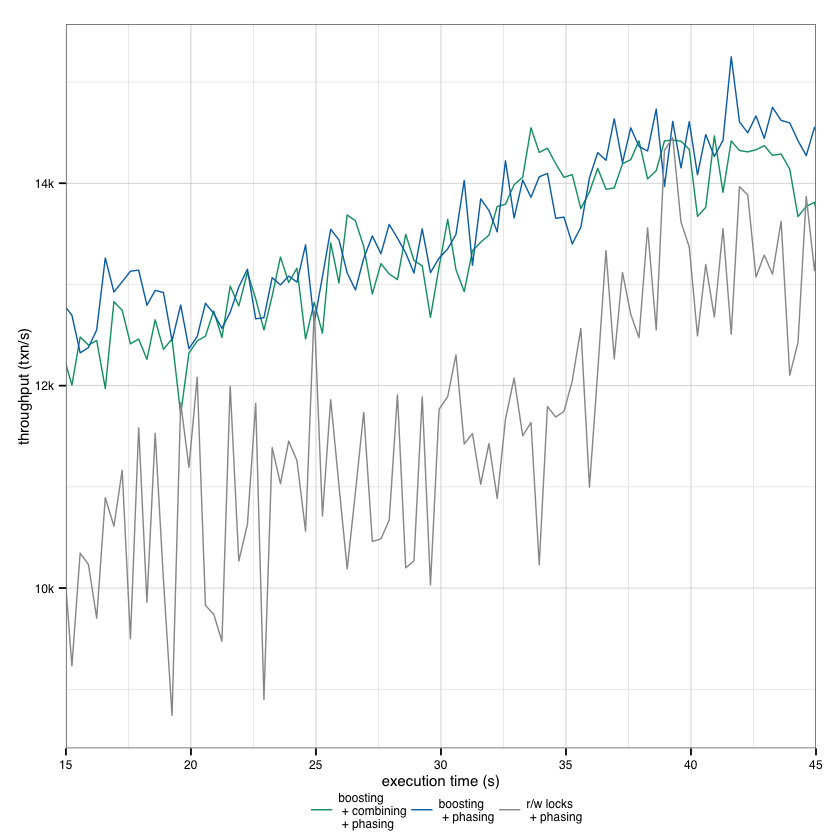

In [9]:
  ggplot(samples, aes(
    x = x,
    y = y,
    color = cc_ph, fill = cc_ph
  ))+
    xlab('execution time (s)')+
    ylab('throughput (txn/s)')+
    stat_summary(geom='line', fun.y=mean, size=0.4)+
    scale_x_continuous()+
    scale_y_continuous(labels = function(x){ x/1000+'k' })+
    cc_ph_scales(name = '', guide = guide_legend(nrow = 1))+
    coord_cartesian(xlim=c(15,45))+
    my_theme()+legend.bottom()+theme(legend.margin = unit(-25,'pt'), legend.background = element_rect(fill=alpha('white', 0)), legend.key.width = unit(16,'pt'))

In [5]:
library(TTR)

In [68]:
samples <- ddply(samples, .(x,cc_ph), summarize, y = mean(y))
nrow(samples)

[1] 288

In [69]:
s <- subset(samples, cc_ph == COMB+PH)
data.frame(subset(s, select=c('cc_ph','x','y')), var = runMean(s$y, n = 10))

Warning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generated

,cc_ph,x,y,var
1,boosting + combining + phasing,14.25,12208.14515152,NA
4,boosting + combining + phasing,14.58,12879.9009090909,NA
7,boosting + combining + phasing,14.91,12288.0928374655,NA
10,boosting + combining + phasing,15.24,12005.1957575782,NA
13,boosting + combining + phasing,15.57,12480.7176033091,NA
16,boosting + combining + phasing,15.9,12401.3003030327,NA
19,boosting + combining + phasing,16.23,12445.8911212109,NA
22,boosting + combining + phasing,16.575,11971.9139974733,NA
25,boosting + combining + phasing,16.92,12829.2308815418,NA
28,boosting + combining + phasing,17.25,12744.6037465527,12425.4992308775


In [129]:
ddply(na.omit(samples), .(cc_ph), summarize, mean_sd = sd(y))

,cc_ph,mean_sd
1,boosting + combining + phasing,743.4324
2,boosting + phasing,734.8474
3,r/w locks + phasing,1356.051


In [132]:
var <- function(s) runSD(s$y, n = 15)

s <- subset(samples, cc_ph == COMB+PH)
s.comb <- data.frame(s, var = var(s))
s <- subset(samples, cc_ph == COMM+PH)
s.comm <- data.frame(s, var = var(s))
s <- subset(samples, cc_ph == RW+PH)
s.rw <- data.frame(s, var = var(s))
s <- rbind(s.comb, s.comm, s.rw)
    
ddply(na.omit(s), .(cc_ph), summarize, mean_sd = mean(var))

,cc_ph,mean_sd
1,boosting + combining + phasing,310.8772
2,boosting + phasing,287.4268
3,r/w locks + phasing,800.5425


Warning message:
: Removed 42 rows containing missing values (stat_summary).

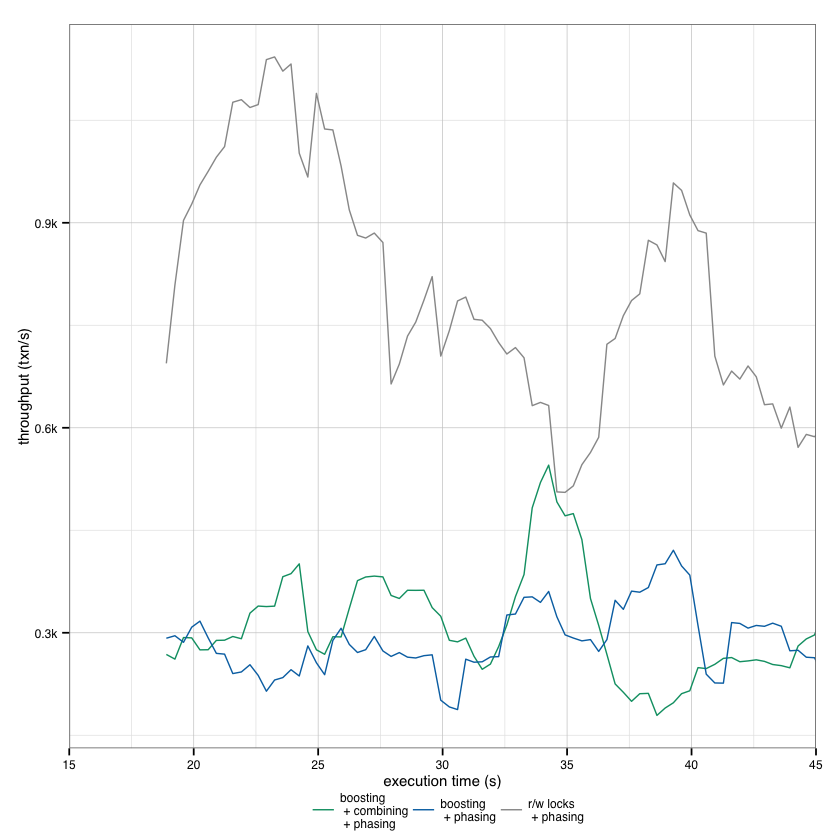

In [133]:
  ggplot(s, aes(
    x = x,
    y = var,
    color = cc_ph, fill = cc_ph
  ))+
    xlab('execution time (s)')+
    ylab('throughput (txn/s)')+
    stat_summary(geom='line', fun.y=mean, size=0.4)+
    scale_x_continuous()+
    scale_y_continuous(labels = function(x){ x/1000+'k' })+
    cc_ph_scales(name = '', guide = guide_legend(nrow = 1))+
    coord_cartesian(xlim=c(15,45))+
    my_theme()+legend.bottom()+theme(legend.margin = unit(-25,'pt'), legend.background = element_rect(fill=alpha('white', 0)), legend.key.width = unit(16,'pt'))